# FORECASTING ON AIRLINES DATA

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
from sklearn.metrics import mean_squared_error

In [2]:
airdata=pd.read_excel('Airlines+Data.xlsx')
airdata

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


# DATA VISUALIZATION

## HISTOGRAM

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A753DFEDF0>]],
      dtype=object)

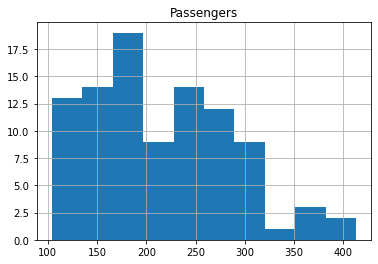

In [3]:
# create a histogram plot
airdata.hist()

## DENSITY PLOT

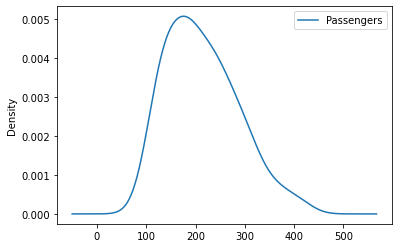

In [4]:
# create a density plot
from matplotlib import pyplot
series=pd.read_excel('Airlines+Data.xlsx', header=0, index_col=0,parse_dates=True)
series.plot(kind='kde')
pyplot.show()

## LINE PLOT

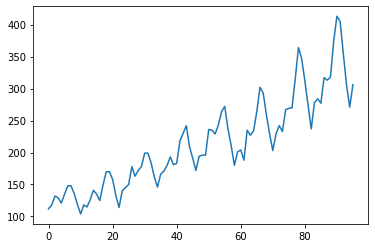

In [5]:
airdata.Passengers.plot()

##  HEATMAP

In [6]:
airdata['Date']=pd.to_datetime(airdata.Month,format='%b-%y')

In [7]:
airdata['month']=airdata.Date.dt.strftime('%b')
airdata['year']=airdata.Date.dt.strftime('%Y')

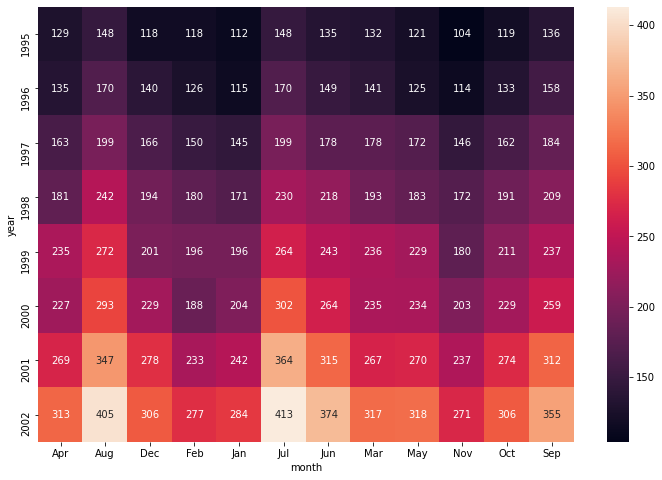

In [8]:
plt.figure(figsize=(12,8))
hm_y_mth=pd.pivot_table(data=airdata,values='Passengers',index='year',columns='month',aggfunc='mean',fill_value=0)
sns.heatmap(data=hm_y_mth,annot=True,fmt='g')

## BOX PLOT and LINE PLOT

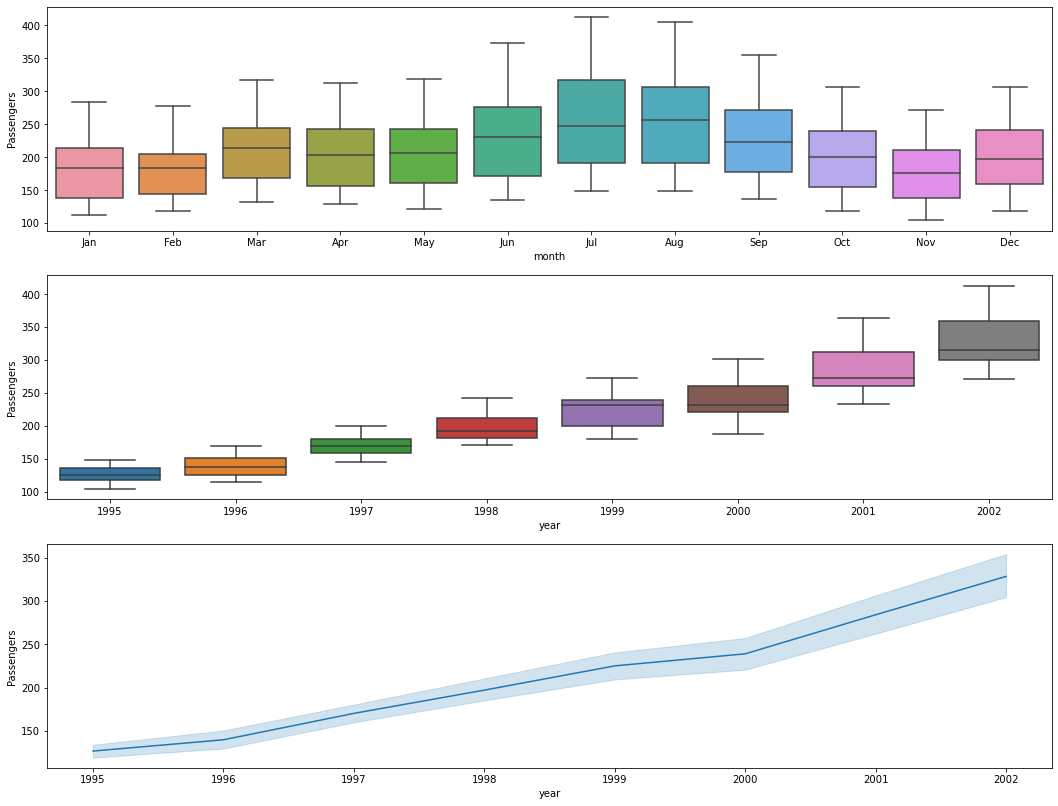

In [9]:
# create a boxplot of yearly data
plt.figure(figsize=(18,14))
plt.subplot(311)
sns.boxplot(x='month',y='Passengers',data=airdata)
plt.subplot(312)
sns.boxplot(x='year',y='Passengers',data=airdata)
plt.subplot(313)
sns.lineplot(x='year',y='Passengers',data=airdata)

## LAG PLOT

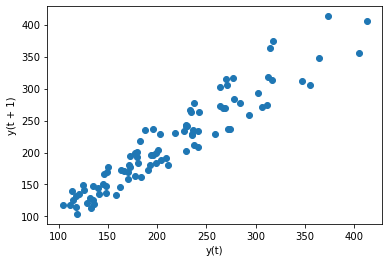

In [10]:
# create a scatter plot
from matplotlib import pyplot
from pandas.plotting import lag_plot
series=pd.read_excel('Airlines+Data.xlsx', header=0, index_col=0,parse_dates=True)
lag_plot(series)
pyplot.show()

## AUTOCORRELATION PLOT

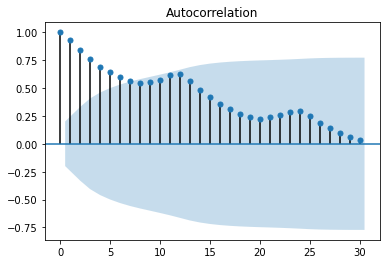

In [11]:
# create an autocorrelation plot
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series=pd.read_excel('Airlines+Data.xlsx', header=0, index_col=0,parse_dates=True)
plot_acf(series,lags=30)
pyplot.show()

## Time - Series Decomposition Plot

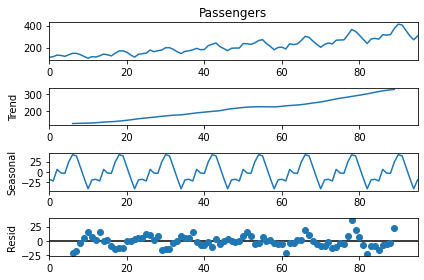

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
dec_ts=seasonal_decompose(airdata.Passengers,period=12)
dec_ts.plot()
plt.show()

## Creating dummies for model based approach

In [13]:
# creating dummies
Month_Dummies = pd.DataFrame(pd.get_dummies(airdata['month']))
airline = pd.concat([airdata,Month_Dummies],axis = 1)

In [14]:
airline["t"] = np.arange(1,97)

airline["t_sq"] = airline["t"]*airline["t"]

airline["log_Passengers"] = np.log(airline["Passengers"])
airline

,Month,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_sq,log_Passengers
0,1995-01-01,112,1995-01-01,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,2002-09-01,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,2002-10-01,306,2002-10-01,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,2002-11-01,271,2002-11-01,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


In [15]:
airline

,Month,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_sq,log_Passengers
0,1995-01-01,112,1995-01-01,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,2002-09-01,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,2002-10-01,306,2002-10-01,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,2002-11-01,271,2002-11-01,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


In [16]:
airline.nunique()

Month             96
Passengers        80
Date              96
month             12
year               8
Apr                2
Aug                2
Dec                2
Feb                2
Jan                2
Jul                2
Jun                2
Mar                2
May                2
Nov                2
Oct                2
Sep                2
t                 96
t_sq              96
log_Passengers    80
dtype: int64

## SPLIT THE DATA

In [17]:
# Splitting data
Train = airline.head(78)
Test = airline.tail(18)

In [18]:
Train

,Month,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_sq,log_Passengers
0,1995-01-01,112,1995-01-01,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2001-02-01,233,2001-02-01,Feb,2001,0,0,0,1,0,0,0,0,0,0,0,0,74,5476,5.451038
74,2001-03-01,267,2001-03-01,Mar,2001,0,0,0,0,0,0,0,1,0,0,0,0,75,5625,5.587249
75,2001-04-01,269,2001-04-01,Apr,2001,1,0,0,0,0,0,0,0,0,0,0,0,76,5776,5.594711
76,2001-05-01,270,2001-05-01,May,2001,0,0,0,0,0,0,0,0,1,0,0,0,77,5929,5.598422


# Forecasting using model based methods

In [19]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

56.7360430952505

In [20]:
#Exponential

Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

47.82873515777416

In [21]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

54.28117833513575

In [22]:
# Additive seasonality
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.9874027189605

In [26]:
# Additive Seasonality Quadratic
add_sea_Quad = smf.ols('Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

35.735603461190735

In [28]:
# Multiplicative Seasonality
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

138.59615670360742

In [29]:
# Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

11.874925838875287

In [30]:
#Compare the results 
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,56.736043
1,rmse_Exp,47.828735
2,rmse_Quad,54.281178
3,rmse_add_sea,132.987403
4,rmse_add_sea_quad,35.735603
5,rmse_Mult_sea,138.596157
6,rmse_Mult_add_sea,11.874926


# DATA DRIVEN MODEL

In [31]:
data=pd.read_excel('Airlines+Data.xlsx')

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing,Holt

In [33]:
train=data.head(82)
test=data.tail(14)

## Moving Average

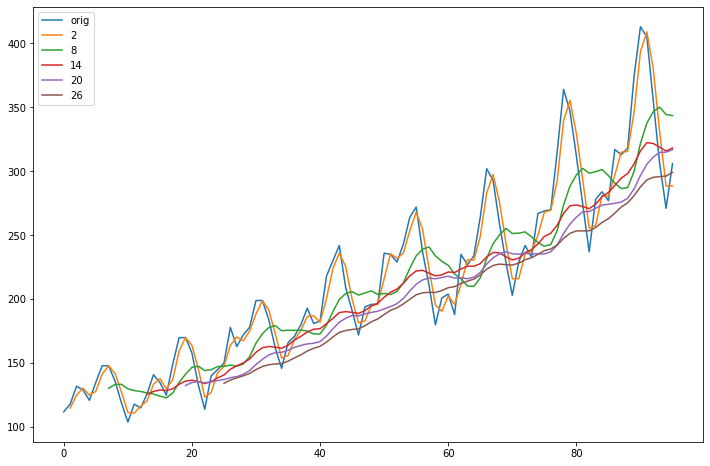

In [34]:
plt.figure(figsize=(12,8))
airdata.Passengers.plot(label='orig')
for i in range(2,30,6):
    airdata.Passengers.rolling(i).mean().plot(label=str(i))

plt.legend(loc='best')

## ACF & PACF Plots

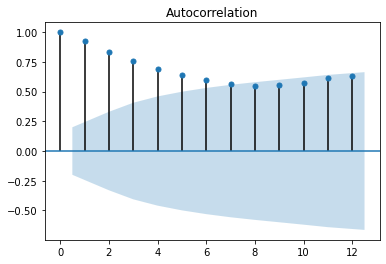

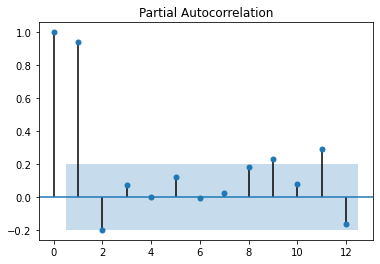

In [35]:
import statsmodels.graphics.tsaplots as tsaplots
tsaplots.plot_acf(airdata.Passengers,lags=12)
tsaplots.plot_pacf(airdata.Passengers,lags=12)
plt.show()

## Evaluation Metric MAPE

In [36]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

## Simple Exponential Method

In [37]:
import warnings
train['Passengers']=train['Passengers'].astype('float')
ses_model=SimpleExpSmoothing(train['Passengers']).fit(smoothing_level=0.2)
pred_ses=ses_model.predict(start=test.index[0],end=test.index[-1])
pred_ses
MAPE_ses=MAPE(pred_ses,test.Passengers)
MAPE_ses

<ipython-input-37-d679e22b9a12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Passengers']=train['Passengers'].astype('float')


12.18743612335729

In [38]:
rmse_ses=sqrt(mean_squared_error(test['Passengers'],pred_ses))
rmse_ses

54.81633211328346

## Holt method

In [39]:
hw_model=Holt(train.Passengers).fit(smoothing_level=0.8,smoothing_slope=0.2)
pred_hw=hw_model.predict(start=test.index[0],end=test.index[-1])
MAPE_hw=MAPE(pred_hw,test.Passengers)
MAPE_hw

18.56785389077064

In [40]:
rmse_hw=sqrt(mean_squared_error(test.Passengers,pred_hw))
rmse_hw

80.64029976406324

## Holt Winter Exponential Smoothing with additive Seasonality and additive Trend

In [41]:
hwe_add_sea_trend_model=ExponentialSmoothing(train['Passengers'],seasonal='add',trend='add',seasonal_periods=12).fit()
pred_hwe_add_sea_trend=hwe_add_sea_trend_model.predict(start=test.index[0],end=test.index[-1])
MAPE_hwe_add_sea=MAPE(pred_hwe_add_sea_trend,test.Passengers)
MAPE_hwe_add_sea

C:\Users\smile\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


2.1583221135150032

In [42]:
rmse_hwe_add_sea=sqrt(mean_squared_error(test.Passengers,pred_hwe_add_sea_trend))
rmse_hwe_add_sea

8.353735707320325

## Holts Winter Exponential Smoothing with multiplicative seasonality and additive trend

In [43]:
hwe_mul_sea_trend_model=ExponentialSmoothing(train.Passengers,seasonal='mul',trend='add',seasonal_periods=12).fit()
pred_hwe_mul_sea_trend=hwe_mul_sea_trend_model.predict(start=test.index[0],end=test.index[-1])
MAPE_hwe_mul_sea=MAPE(pred_hwe_mul_sea_trend,test.Passengers)
MAPE_hwe_mul_sea

3.445501908385419

In [44]:
rmse_hwe_mul_sea=sqrt(mean_squared_error(test.Passengers,pred_hwe_mul_sea_trend))
rmse_hwe_mul_sea

14.936488786857662

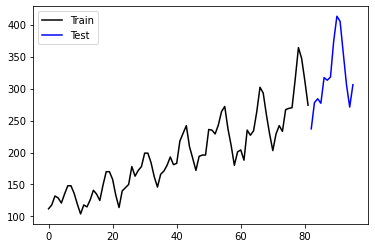

In [45]:
plt.plot(train.index,train["Passengers"],label="Train",color="black") 
plt.plot(test.index,test["Passengers"],label="Test",color="blue")
plt.legend()

In [46]:
Table={"Model":pd.Series(["MAPE_hw","MAPE_ses","MAPE_hwe_add_sea","MAPE_hwe_mul_sea"]),"MAPE_VALUES":pd.Series([MAPE_hw,MAPE_ses,MAPE_hwe_add_sea,MAPE_hwe_mul_sea])}
Table=pd.DataFrame(Table) 
Table.sort_values('MAPE_VALUES')

,Model,MAPE_VALUES
2,MAPE_hwe_add_sea,2.158322
3,MAPE_hwe_mul_sea,3.445502
1,MAPE_ses,12.187436
0,MAPE_hw,18.567854


In [47]:
table_rmse_data={'Model':pd.Series(['rmse_ses','rmse_hw','rmse_hwe_add_sea','rmse_hwe_mul_sea']),"RMSE_Values": pd.Series([rmse_ses,rmse_hw,rmse_hwe_add_sea,rmse_hwe_mul_sea])}
table_rmse_data=pd.DataFrame(table_rmse_data)
table_rmse_data.sort_values('RMSE_Values')

,Model,RMSE_Values
2,rmse_hwe_add_sea,8.353736
3,rmse_hwe_mul_sea,14.936489
0,rmse_ses,54.816332
1,rmse_hw,80.640300


# Forecasting based on ARIMA Model

In [49]:
data1=pd.read_excel('Airlines+Data.xlsx',header=0,index_col=0,parse_dates=True,squeeze=True)

In [50]:
# Seperate Validation dataset
split_point=len(data1)-12
dataset,validation=data1[:split_point],data1[split_point:]
print('Dataset %d, Validation %d'% (len(dataset),len(validation)))
dataset.to_csv('dataset.csv',header=False)
validation.to_csv('validation.csv',header=False)

Dataset 84, Validation 12


## Persistence/ Base model

In [51]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train=pd.read_excel('Airlines+Data.xlsx',header=0,index_col=0,parse_dates=True,squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [52]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>Predicted=259.000, Expected=229.000
>Predicted=229.000, Expected=203.000
>Predicted=203.000, Expected=229.000
>Predicted=229.000, Expected=242.000
>Predicted=242.000, Expected=233.000
>Predicted=233.000, Expected=267.000
>

## ARIMA Hyperparameters

In [53]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

## Grid search for p,d,q values

In [54]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [55]:
# load dataset
train=pd.read_excel('Airlines+Data.xlsx', header=0, index_col=0, parse_dates=True)
#evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

Best ARIMANone RMSE=inf


In [56]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
#evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=78.356
ARIMA(0, 0, 1) RMSE=44.790
ARIMA(0, 1, 0) RMSE=26.206
ARIMA(0, 1, 1) RMSE=25.582
ARIMA(0, 1, 2) RMSE=28.099
ARIMA(0, 1, 3) RMSE=23.953
ARIMA(0, 1, 4) RMSE=22.830
ARIMA(0, 2, 0) RMSE=32.545
ARIMA(0, 2, 1) RMSE=26.939
ARIMA(0, 2, 2) RMSE=26.175
ARIMA(0, 2, 3) RMSE=28.231
ARIMA(0, 2, 4) RMSE=25.182
ARIMA(1, 0, 0) RMSE=26.445
ARIMA(1, 0, 1) RMSE=25.611
ARIMA(1, 1, 0) RMSE=25.940
ARIMA(1, 2, 0) RMSE=31.784
ARIMA(2, 0, 0) RMSE=25.991
ARIMA(2, 1, 0) RMSE=25.659
ARIMA(2, 2, 0) RMSE=30.766
ARIMA(3, 0, 0) RMSE=25.820
ARIMA(3, 0, 1) RMSE=25.243
ARIMA(3, 1, 0) RMSE=25.765
ARIMA(3, 2, 0) RMSE=30.978
ARIMA(4, 0, 0) RMSE=26.056
ARIMA(4, 1, 0) RMSE=25.190
ARIMA(4, 2, 0) RMSE=29.503
ARIMA(4, 2, 1) RMSE=25.848
Best ARIMA(0, 1, 4) RMSE=22.830


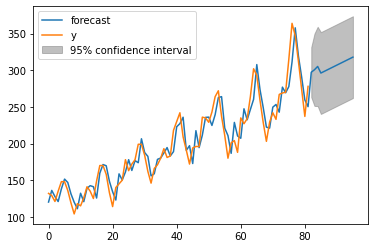

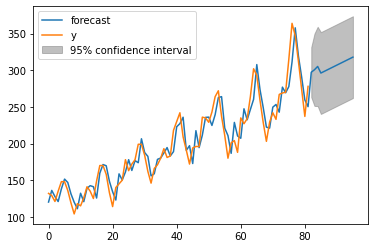

In [57]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

# fit model
model = ARIMA(X, order=(0,1,4))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 96)

## Build model based on optimized values

In [58]:
model=ARIMA(X,order=(0,1,4))
model_fit=model.fit()
forecast=model_fit.forecast(10)[0]
forecast

array([297.29504638, 300.66282225, 305.18875232, 296.16873359,
       298.33910982, 300.50948606, 302.67986229, 304.85023852,
       307.02061476, 309.19099099])

## By above all method of models Holt Winter Exponential Smoothing with additive Seasonality and additive Trend only gives best RMSE value.So we build final model using this model.

## Final Model by combining train and test - Data Driven Method

In [59]:
airdata['Passengers']=airdata['Passengers'].astype('double')
hwe_mul_sea_trend_model=ExponentialSmoothing(airdata['Passengers'],seasonal='mul',trend='add',seasonal_periods=12).fit()

In [60]:
# forecast for 10 months
hwe_mul_sea_trend_model.forecast(10)

96     312.903311
97     308.177321
98     355.541278
99     345.780367
100    345.708527
101    392.486373
102    436.520102
103    429.878732
104    380.191588
105    332.335388
dtype: float64

## For Comparing the data driven model,let build arima model for final combining train and test

In [61]:
data_final=pd.read_excel('Airlines+Data.xlsx',header=0,index_col=0,parse_dates=True)
X=airdata.Passengers.values
X=X.astype('float32')

In [62]:
model_arima=ARIMA(X,order=(2,1,0)).fit()

In [63]:
forecast=model_arima.forecast(10)[0]
forecast

array([327.97230142, 328.21292395, 324.77128539, 325.60478726,
       328.72971905, 331.51487022, 333.61636618, 335.58444335,
       337.68138898, 339.8530329 ])

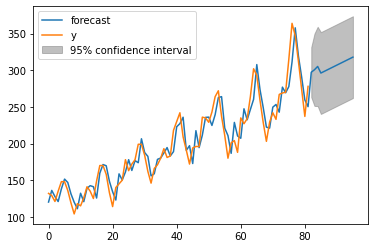

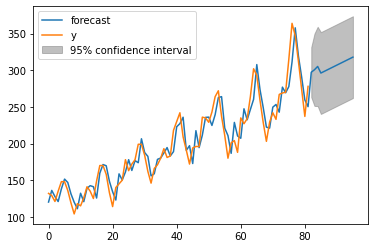

In [64]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,96)

# CONCLUSION:
##                           By performing both Model based approach and Data Driven approach for airline data,Holt Winter Exponential Smoothing with additive Seasonality and additive Trend only gives best RMSE about 8.353736,so we build the final model.We also created dummies column for month in model based approach